In [1]:
from fastbook import *
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.IMAGENETTE)

File downloaded is broken. Remove /root/.fastai/archive/imagenette2.tgz and try again.


In [3]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=[*aug_transforms(size=224, min_scale=0.75)]
)
dls = dblock.dataloaders(path, bs=64)

In [6]:
dls.c

10

In [7]:
model = xresnet50(n_out=dls.c)
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)

SuggestedLRs(lr_min=0.0002511886414140463, lr_steep=9.120108734350652e-05)

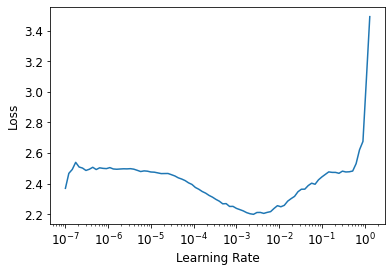

In [8]:
learn.lr_find()

In [9]:
learn.fit_one_cycle(5, 2e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.563470,3.489175,0.355116,06:11
1,1.198617,1.513864,0.572069,06:25
2,0.893340,1.149903,0.625467,06:21
3,0.681172,0.649417,0.790889,06:10
4,0.561150,0.571097,0.821882,06:26


<AxesSubplot:>

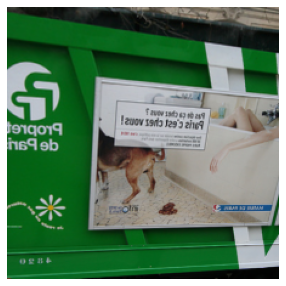

In [14]:
x,y = dls.one_batch()
PILImage.show(x[0])

In [17]:
def get_dls(bs=64,size=224):
    dblock = DataBlock(
        blocks=(ImageBlock,CategoryBlock),
        get_items=get_image_files,
        get_y=parent_label,
        item_tfms=Resize(460),
        batch_tfms=[
            *aug_transforms(size=size, min_scale=0.75),
            Normalize.from_stats(*imagenet_stats)
        ]
    )
    return dblock.dataloaders(path,bs=bs)

In [18]:
dls = get_dls()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<AxesSubplot:>

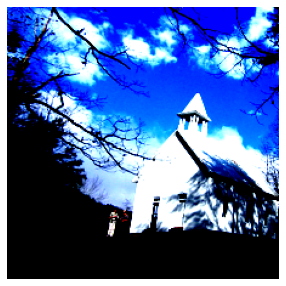

In [19]:
x,y = dls.one_batch()
PILImage.show(x[0])

In [24]:
xmean = x.mean(dim=[0,2,3])
xmean, xmean.shape, x.shape

(TensorImage([-0.1970, -0.0482,  0.1142], device='cuda:0'),
 (3,),
 (64, 3, 224, 224))

In [26]:
t1 = torch.ones([64,3,20,20])

In [30]:
s = t1.sum(dim=[0,2,3])
s, s.shape

(tensor([25600., 25600., 25600.]), torch.Size([3]))

In [34]:
model = xresnet50(n_out=dls.c)
learn = Learner(dls, model, loss_func = CrossEntropyLossFlat(), metrics=accuracy)
learn.fit_one_cycle(5, 2e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.581141,2.277145,0.399552,06:26
1,1.227365,1.932937,0.456684,06:17
2,0.930070,1.336547,0.634429,06:11
3,0.714876,0.798733,0.749066,06:26
4,0.600108,0.570659,0.815907,06:18


In [35]:
def get_learner(dls):
    return Learner(dls, xresnet50(n_out = dls.c), loss_func=CrossEntropyLossFlat(), metrics=accuracy)

In [36]:
dls = get_dls(128, 128)
learn = get_learner(dls)
learn.fit_one_cycle(4, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.637837,3.046115,0.365571,02:26
1,1.270585,1.094260,0.627334,02:30
2,0.961249,0.825946,0.734130,02:32
3,0.752079,0.668247,0.795370,02:32


In [37]:
dls = get_dls(64, 224)
learn.dls = dls
learn.fine_tune(5,1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.809687,1.065924,0.693801,06:16


epoch,train_loss,valid_loss,accuracy,time
0,0.652030,0.688683,0.784167,06:12
1,0.663113,1.212981,0.651606,06:27
2,0.578225,0.614097,0.804332,06:16
3,0.499579,0.487912,0.840926,06:12
4,0.433992,0.438286,0.858476,06:26
